In [7]:
# General Imports
import os
import numpy as np
import pandas as pd
from time import strftime, localtime
import matplotlib.pyplot as plt
#from utilities import create_analysis_report, load_validation_set_raw
from skimage.transform import resize

import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, cohen_kappa_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, \
    hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import check_random_state
import seaborn as sn 
sn.set(font_scale=3)  # for label size

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Computing and plotting results

In [2]:
OUTPUT_PATH ="/srv/workspace/research/mlml/experiments_results_nus/"
MICRO_OCE_results_pd = pd.DataFrame()
for split in np.arange(1,5):
    for ratio in np.arange(0,1,0.25): 
        experiment_path = OUTPUT_PATH+'nus_3labels_original_CE'  + str(round(ratio, 1)) + 'split_' + str(split)
        dirs = os.listdir(experiment_path)
        predictions = np.loadtxt(experiment_path + '/' + dirs[0] + '/predictions.out',delimiter=',')
        groundtruth = np.loadtxt(experiment_path + '/' + dirs[0] + '/test_ground_truth_classes.txt',delimiter=',')
        pred_rounded = np.round(predictions)
        recall = recall_score(groundtruth, pred_rounded, average='micro')
        precision = precision_score(groundtruth, pred_rounded, average='micro')
        f1 = f1_score(groundtruth, pred_rounded, average='micro')
        auc = roc_auc_score(groundtruth, predictions, average='micro')
        split_ratio_results = pd.DataFrame({"Recall": [recall], "Precision": [precision], "f1-score": [f1], 'AUC' : [auc]})
        split_ratio_results['ratio'] = ratio
        MICRO_OCE_results_pd = pd.concat([MICRO_OCE_results_pd,split_ratio_results])

In [3]:
OUTPUT_PATH ="/srv/workspace/research/mlml/experiments_results_nus/"
MICRO_weighted_CE_results_pd = pd.DataFrame()
for split in np.arange(1,5):
    for ratio in np.arange(0,1,0.25): 
        experiment_path = OUTPUT_PATH+'nus_3labels_weighted_CE'  + str(round(ratio, 1)) + 'split_' + str(split)
        dirs = os.listdir(experiment_path)
        predictions = np.loadtxt(experiment_path + '/' + dirs[0] + '/predictions.out',delimiter=',')
        groundtruth = np.loadtxt(experiment_path + '/' + dirs[0] + '/test_ground_truth_classes.txt',delimiter=',')
        pred_rounded = np.round(predictions)
        recall = recall_score(groundtruth, pred_rounded, average='micro')
        precision = precision_score(groundtruth, pred_rounded, average='micro')
        f1 = f1_score(groundtruth, pred_rounded, average='micro')
        auc = roc_auc_score(groundtruth, predictions, average='micro')
        split_ratio_results = pd.DataFrame({"Recall": [recall], "Precision": [precision], "f1-score": [f1], 'AUC' : [auc]})
        split_ratio_results['ratio'] = ratio
        #split_ratio_results['split'] = split 
        MICRO_weighted_CE_results_pd = pd.concat([MICRO_weighted_CE_results_pd,split_ratio_results])

In [4]:
OUTPUT_PATH ="/srv/workspace/research/mlml/experiments_results_nus/"
MICRO_correlation_CE_results_pd = pd.DataFrame()
for split in np.arange(1,5):
    for ratio in np.arange(0,1,0.25): 
        experiment_path = OUTPUT_PATH+'nus_3labels_correlations_CE'  + str(round(ratio, 1)) + 'split_' + str(split)
        dirs = os.listdir(experiment_path)
        predictions = np.loadtxt(experiment_path + '/' + dirs[0] + '/predictions.out',delimiter=',')
        groundtruth = np.loadtxt(experiment_path + '/' + dirs[0] + '/test_ground_truth_classes.txt',delimiter=',')
        pred_rounded = np.round(predictions)
        recall = recall_score(groundtruth, pred_rounded, average='micro')
        precision = precision_score(groundtruth, pred_rounded, average='micro')
        f1 = f1_score(groundtruth, pred_rounded, average='micro')
        auc = roc_auc_score(groundtruth, predictions, average='micro')
        split_ratio_results = pd.DataFrame({"Recall": [recall], "Precision": [precision], "f1-score": [f1], 'AUC' : [auc]})
        split_ratio_results['ratio'] = ratio
        #split_ratio_results['split'] = split 
        MICRO_correlation_CE_results_pd = pd.concat([MICRO_correlation_CE_results_pd,split_ratio_results])

In [5]:
MICRO_OCE_results_pd['method'] = 'CE'
MICRO_weighted_CE_results_pd['method']= 'IM-WCE'
MICRO_correlation_CE_results_pd['method'] = 'CB-WCE'
all_results = pd.concat([MICRO_OCE_results_pd,MICRO_weighted_CE_results_pd,MICRO_correlation_CE_results_pd])

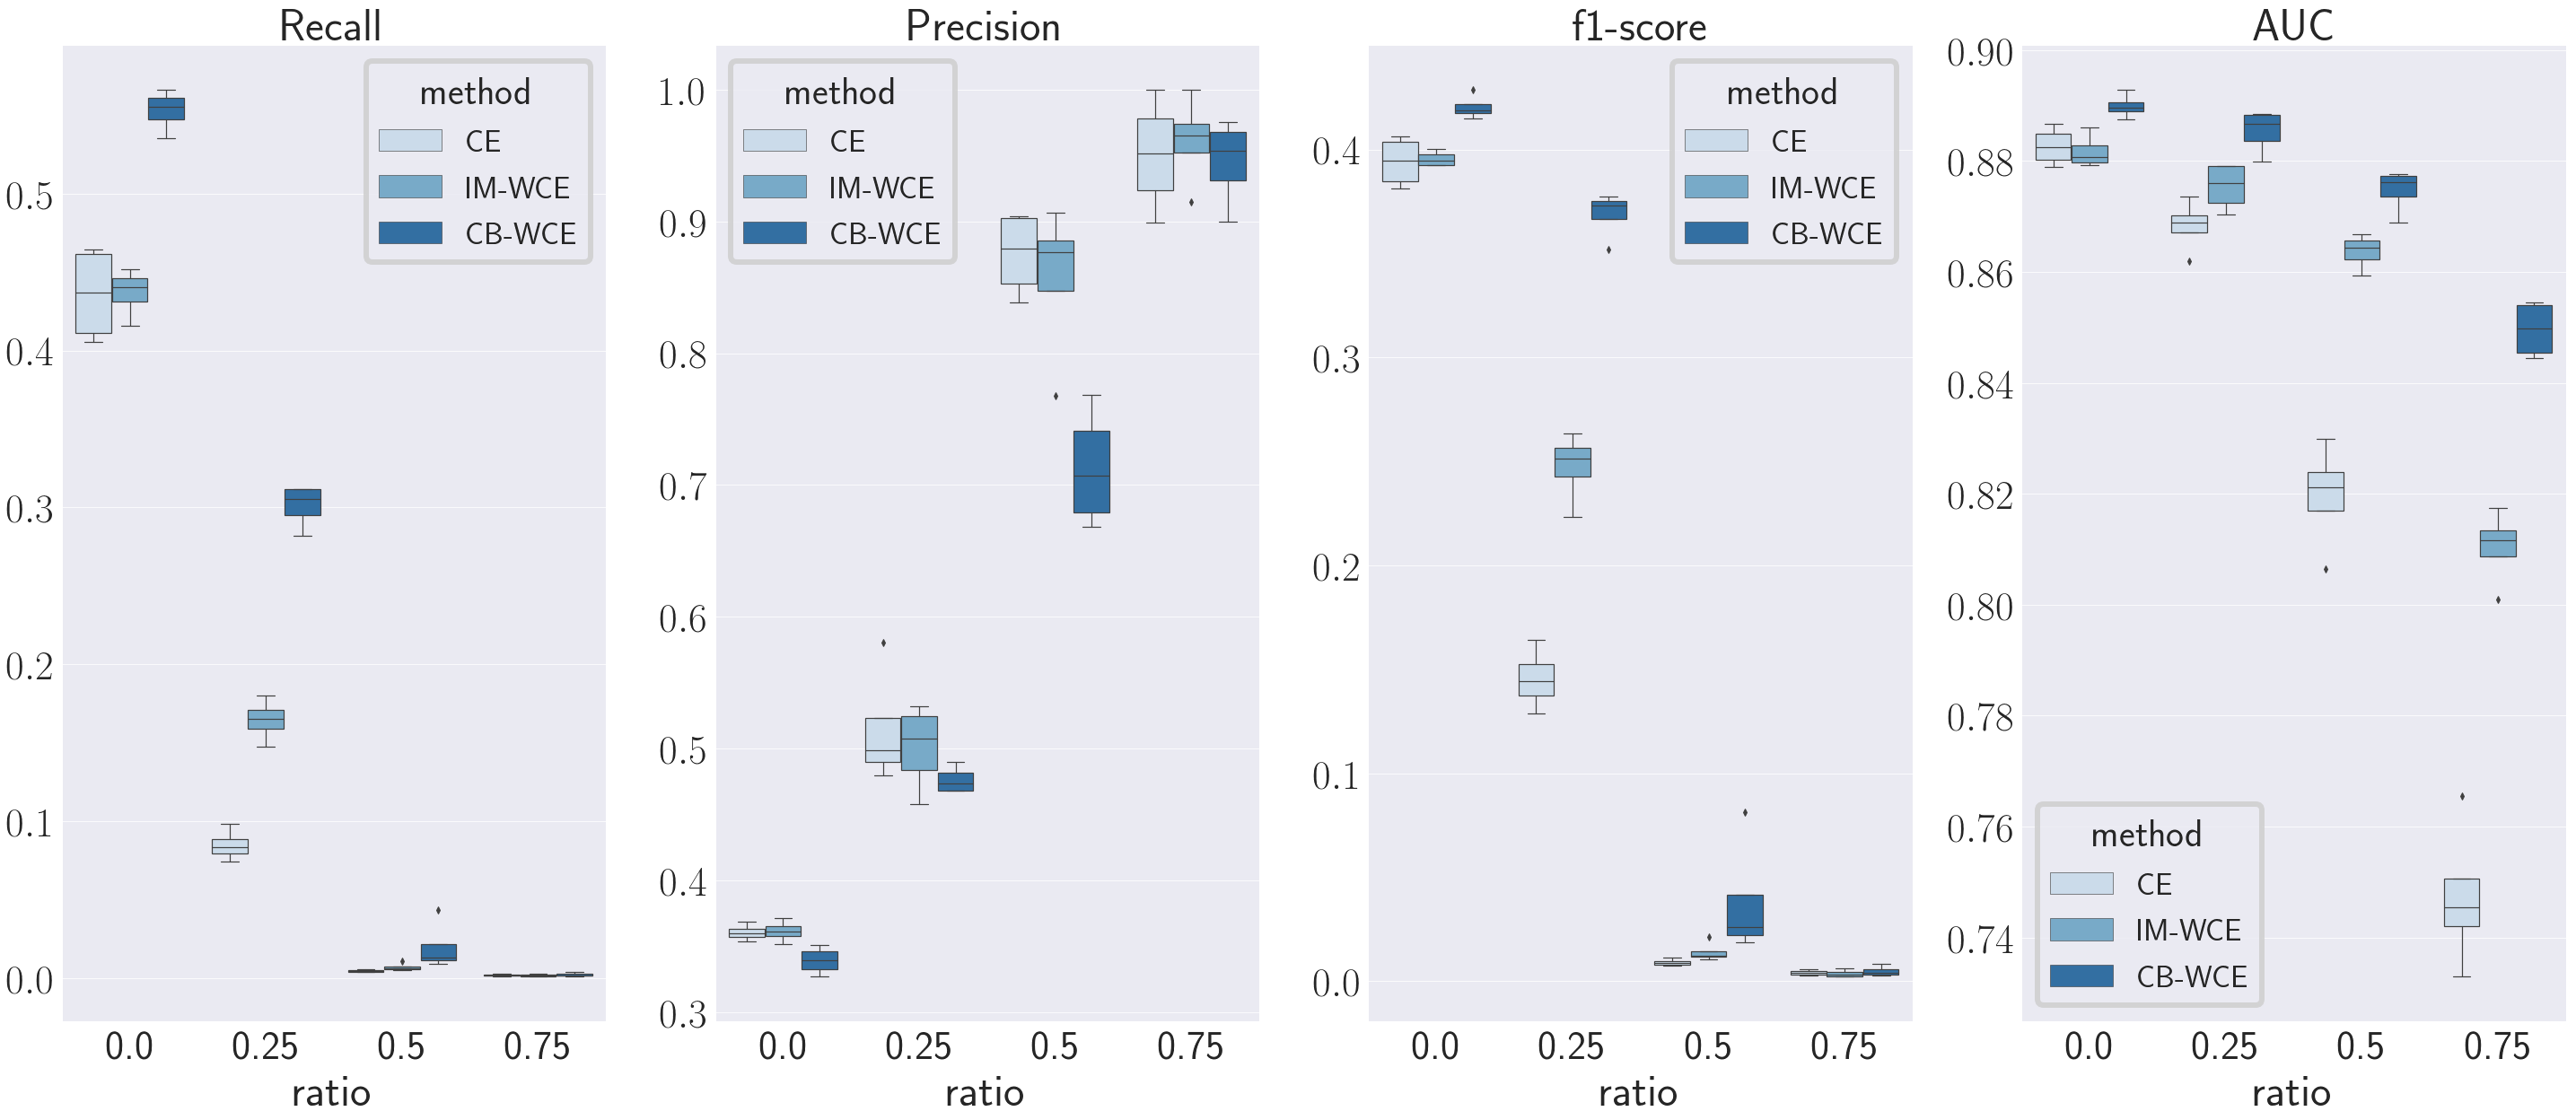

In [8]:
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

sn.set_context("paper", rc={"font.size":50,"axes.titlesize":50,
    "axes.labelsize" : 50,
    "xtick.labelsize" : 45,
    "ytick.labelsize" : 45,
    "legend.fontsize":35 })  
plt.rcParams['patch.linewidth'] = 6
plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams["patch.force_edgecolor"] = True

#sn.set(font_scale=3)  # for label size
fig, ax_new = plt.subplots(1,4, sharey=False,figsize = [50,20])
columns_To_plot = all_results.columns[:-2]
for column, plot_column in zip(columns_To_plot,ax_new.flatten()):
    sn.boxplot(y=column, x='ratio', 
                     data=all_results,
                     palette=sn.color_palette("Blues", 3),
                     hue='method',ax =plot_column)
    plot_column.title.set_text(column)
    plot_column.set_ylabel('')

plt.savefig('/srv/workspace/research/mlml/figures/nusresults.pdf',dpi=300, format = 'pdf',bbox_inches='tight')
